In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

Temporary imports before 'conda env update' is finished

In [3]:
# from pathlib import Path
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# # from fastai.plots import *

In [18]:
PATH = Path('data')
celeba = Path('celeba')
imspath = PATH/celeba/'img_align_celeba'
# sz=299
# arch=resnext50
bs=32

In [5]:
csv_attr = pd.read_csv(str(PATH/celeba/'list_attr_celeba.csv'))

In [6]:
for row in csv_attr.columns:
    print(row)

image_id
5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young


In [7]:
csv_with_glasses = csv_attr.loc[csv_attr['Eyeglasses']==1]

In [8]:
csv_with_glasses.shape[0]

13193

In [9]:
image_id_with_glasses = csv_with_glasses['image_id'].tolist()

In [10]:
imspaths = [imspath/o for o in image_id_with_glasses]
imspaths_str = [str(o) for o in imspaths]

In [11]:
imspaths[:2], imspaths_str[:2]

([PosixPath('data/celeba/img_align_celeba/000053.jpg'),
  PosixPath('data/celeba/img_align_celeba/000093.jpg')],
 ['data/celeba/img_align_celeba/000053.jpg',
  'data/celeba/img_align_celeba/000093.jpg'])

Write list to disk

In [12]:
df = pd.DataFrame(imspaths_str)

In [13]:
df.head()

,0
0,data/celeba/img_align_celeba/000053.jpg
1,data/celeba/img_align_celeba/000093.jpg
2,data/celeba/img_align_celeba/000119.jpg
3,data/celeba/img_align_celeba/000144.jpg
4,data/celeba/img_align_celeba/000152.jpg


In [16]:
df.to_csv('imspaths_glass_celeba.csv', index=False, header=False)

In [45]:
def ceildiv(a, b):
    return -(-a // b)
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None, maintitle=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3): ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    if maintitle is not None:
        plt.suptitle(maintitle, fontsize=16)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, ceildiv(len(ims), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plots images given image files.

    Arguments:
        im_paths (list): list of paths
        figsize (tuple): figure size
        rows (int): number of rows
        titles (list): list of titles
        maintitle (string): main title
    """
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=16)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

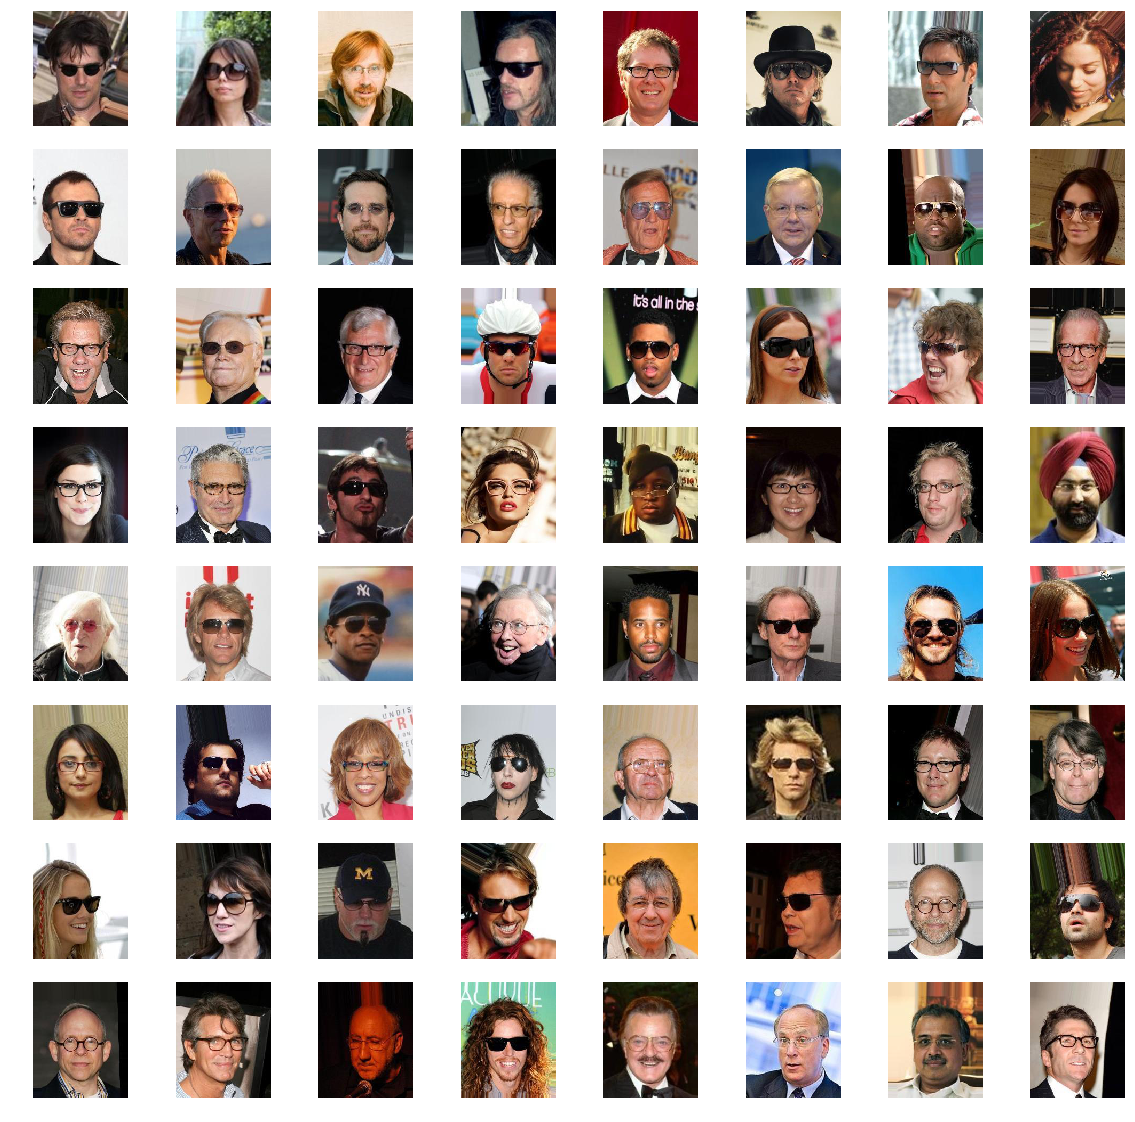

In [58]:
num_ims = 8 * 8
plots_from_files(imspaths_str[:num_ims], figsize=(20, 20), rows=num_ims//8)